<a href="https://colab.research.google.com/github/ankush2805/EIP/blob/master/NMist_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


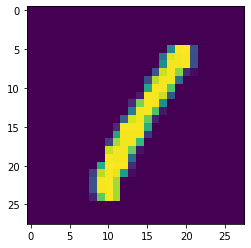

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[3])

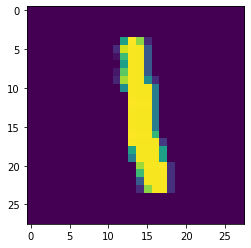

In [6]:
plt.imshow(X_train[6])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [114]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [115]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 1, 1, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [117]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1140 - acc: 0.9652
Epoch 2/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0379 - acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0273 - acc: 0.9914
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0204 - acc: 0.9937
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0158 - acc: 0.9951
Epoch 6/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0132 - acc: 0.9958
Epoch 7/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0115 - acc: 0.9963
Epoch 8/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0087 - acc: 0.9971
Epoch 9/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0083 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================] - 10s 163us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [108]:
print(score)

[0.02676203621702298, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [120]:
print(y_pred[:9])
print(y_test[:9])

[[6.8329221e-16 2.0087892e-16 3.3897223e-13 1.4824549e-08 3.9713470e-21
  1.4352923e-18 8.4262853e-21 1.0000000e+00 2.8027923e-16 2.6973906e-11]
 [2.2911043e-13 2.5579538e-10 1.0000000e+00 7.8957625e-15 1.2148390e-13
  7.5340180e-22 8.8563892e-11 2.2169268e-18 3.5734379e-13 2.0533750e-18]
 [3.7978559e-08 9.9997950e-01 7.1519770e-07 1.7082066e-09 2.7651211e-06
  6.6631308e-08 3.0078272e-07 3.0250139e-06 1.3566938e-05 5.1467819e-10]
 [1.0000000e+00 1.2640448e-17 7.9222897e-13 3.1455283e-13 6.9230115e-11
  3.5216910e-12 3.6028275e-08 2.0940549e-13 6.8282491e-11 2.1459645e-09]
 [1.1250493e-18 9.1476865e-15 2.4283076e-17 2.0779112e-19 1.0000000e+00
  8.5819399e-19 1.9330427e-16 3.6664845e-21 4.2022147e-15 2.9984088e-11]
 [5.5666600e-09 9.9999917e-01 6.8198581e-08 1.1682008e-12 3.3492032e-07
  3.4063474e-11 1.1922436e-09 4.3739539e-07 2.6968163e-08 8.7437231e-11]
 [2.7679411e-24 3.1344485e-13 3.1936583e-15 2.0088714e-18 1.0000000e+00
  2.6681978e-15 2.6293324e-19 2.6955621e-13 2.0836506e-11 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

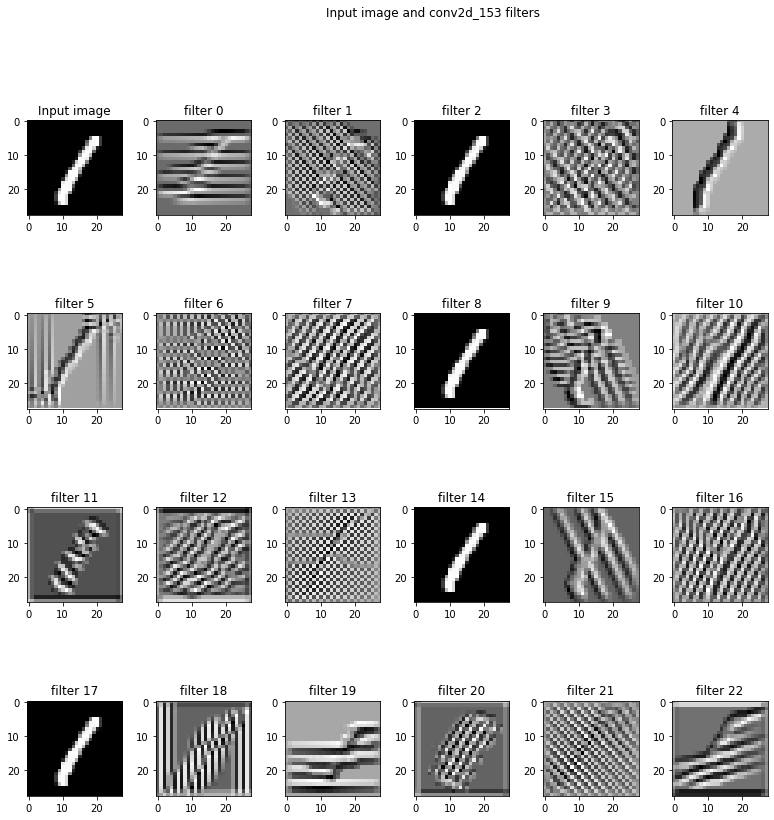

In [123]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_153'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()